# Titanic in Machine Learning
Yutao Chen  
04/05/2019

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score


# Prepara the data

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train_len = len(train)
test_ID = test["PassengerId"]


In [3]:
print(train.columns.values)  # see all the titles of the data


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# see the general info about the data
train.info()
print('-'*40)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
# combine training and testing for processing
all_data = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True)
all_data = all_data.fillna(np.nan) # fill the all different kinds of missing data with NaN
all_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
all_data.isnull().sum()  # see if there are some missing values


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Analysis and process the data column by colum

## 1. Pclass

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


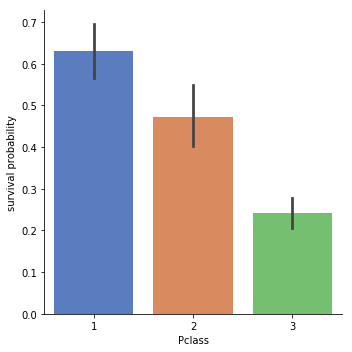

In [8]:
g = sns.catplot(x="Pclass",y="Survived",data=train,kind="bar",palette = "muted")
g = g.set_ylabels("survival probability")


We can see that the people in first class have higher survival probability. While the people in third class have the lowest.   
There is no missing data for this column, so we don't need to fill missing data.   
The data type is int and is 1, 2 and 3. So we don't need to do anythin with the data.  

## 2. Name

In [9]:
# Name (Title)
all_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [10]:
# Only take the title in the name
title = [i.split(",")[1].split(".")[0].strip() for i in all_data["Name"]]
all_data["Title"] = pd.Series(title)
all_data["Title"].head()


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [11]:
# show all the different titles
all_data["Title"].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [12]:
# see if there are any missing data
all_data["Title"].isnull().sum()


0

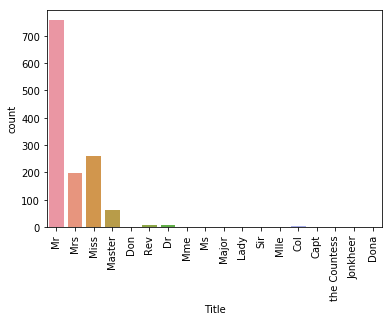

In [13]:
g = sns.countplot(x="Title",data=all_data)
g = plt.pyplot.setp(g.get_xticklabels(), rotation=90)


In [14]:
# Encode the title as 0, 1, 2 and 3
# All the title with very few people are grouped together
all_data["Title"] = all_data["Title"].replace(["Don","Rev","Dr","Major","Mlle","Col","Mme",
                                               "Ms","Lady","Sir","Capt","the Countess","Jonkheer","Dona"], 'Rare')
all_data["Title"] = all_data["Title"].map({"Mr":0, "Mrs":1, "Miss" : 1 , "Master":2, "Rare":3})
all_data["Title"] = all_data["Title"].astype(int)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


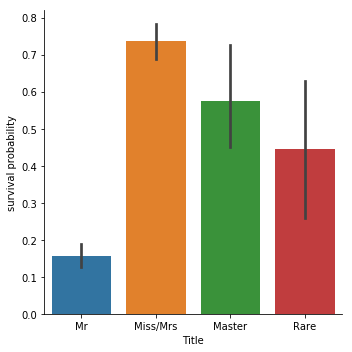

In [15]:
g = sns.catplot(x="Title",y="Survived",data=all_data,kind="bar")
g = g.set_xticklabels(["Mr","Miss/Mrs","Master","Rare"])
g = g.set_ylabels("survival probability")


In [16]:
# don't need the column "Name" 
all_data.drop(labels = ["Name"], axis = 1, inplace = True)


In general, the title in name tell us some about this people. Maybe people with some titles have higher probability to survive.  


## 3. Sex

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


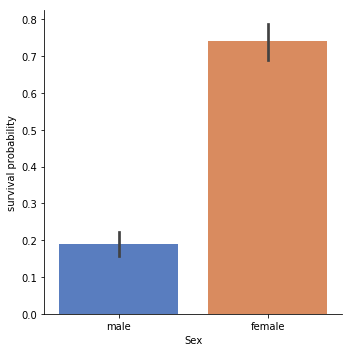

In [17]:
# Sex
g = sns.catplot(x="Sex",y="Survived",data=all_data,kind="bar",palette = "muted")
g = g.set_ylabels("survival probability")


In [18]:
all_data["Sex"] = all_data["Sex"].map({"male": 0, "female":1})
all_data["Sex"] = all_data["Sex"].astype(int)
all_data["Sex"].head()


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

Female have higher probability to survive in general.   
The only thing we need to do with "Sex" is to encode it into 0 and 1.  

## 4. Age

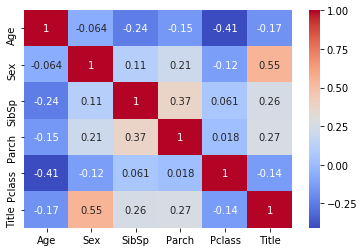

In [19]:
# See which kind of the info is related to the age
# I choose sex, SibSp, Parch, Pclass and Title as candidates
g = sns.heatmap(all_data[["Age","Sex","SibSp","Parch","Pclass","Title"]].corr(),cmap="coolwarm",annot=True)


In [20]:
# Fill all the missing data
Nan_index_age = list(all_data["Age"][all_data["Age"].isnull()].index)  # index of missing data

for i in Nan_index_age:
    median = all_data["Age"].median()
    # the median of all the data with similiar background
    predict = all_data["Age"][((all_data['SibSp'] == all_data.iloc[i]["SibSp"]) & 
                              (all_data['Parch'] == all_data.iloc[i]["Parch"]) & 
                              (all_data['Pclass'] == all_data.iloc[i]["Pclass"]) &
                              (all_data['Title'] == all_data.iloc[i]["Title"]))].median()
    if np.isnan(predict):
        all_data['Age'].iloc[i] = median
    else:
        all_data['Age'].iloc[i] = predict


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
all_data['Age'].isnull().sum()


0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


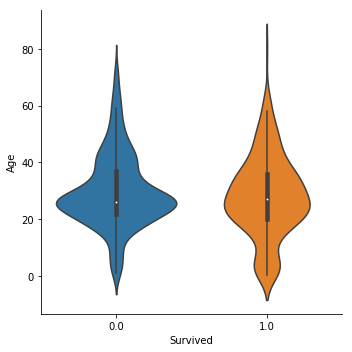

In [22]:
g = sns.catplot(x="Survived", y = "Age",data = all_data, kind="violin")


The most important thing is to find a way to fill the missing data in this columne.  
I used the median number of ages of people with similiar background.  
If there is no median number, we use the overall average age.  
The people at age 0-5 have a relatively high probability to survive.  

## 5. SibSp

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


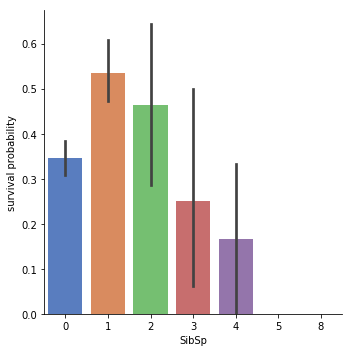

In [23]:
g = sns.catplot(x="SibSp",y="Survived",data=train,kind="bar",palette = "muted")
g = g.set_ylabels("survival probability")


People have 1 or 2 SibSp have higher survival probability

## 6. Parch

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


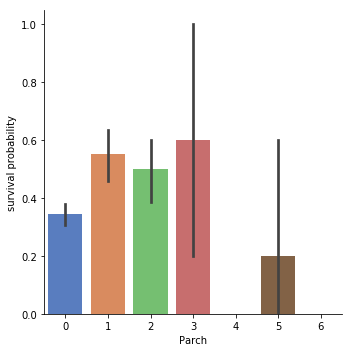

In [24]:
g  = sns.catplot(x="Parch",y="Survived",data=train,kind="bar",palette = "muted")
g = g.set_ylabels("survival probability")


People have 1, 2 or 3 Parch have higher survival probability

## 7. Ticket

In [25]:
all_data['Ticket'].head()


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [26]:
# Take the prefix of the ticket to represent different kind of ticket
# If the ticket is all number, I use "Num" to represent
Ticket = []
for i in list(all_data.Ticket):
    if i.isdigit():
        Ticket.append('Num')
    else:
        Ticket.append(i.replace(".","").strip().split(" ")[0])
all_data["Ticket"] = Ticket
all_data["Ticket"].head()


0        A/5
1         PC
2    STON/O2
3        Num
4        Num
Name: Ticket, dtype: object

## 8. Fare

In [27]:
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].median())


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


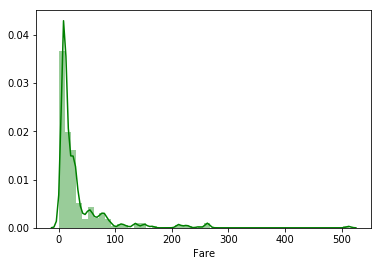

In [28]:
g = sns.distplot(all_data["Fare"], color="g")


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


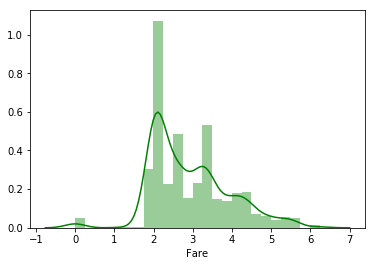

In [29]:
all_data["Fare"] = all_data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(all_data["Fare"], color="g")


Wide range of the data may reduce the accuracy. So, we take the log to narrow the range.

## 9. Cabin

In [30]:
all_data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [31]:
all_data['Cabin'].isnull().sum()


1014

In [32]:
# 'X' to represent NaN
# Use the first character to represent the other
all_data["Cabin"] = all_data["Cabin"].map(lambda i: 'X' if pd.isnull(i) else i[0])
all_data['Cabin'].isnull().sum()


0

In [33]:
all_data['Cabin'].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin, dtype: object

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


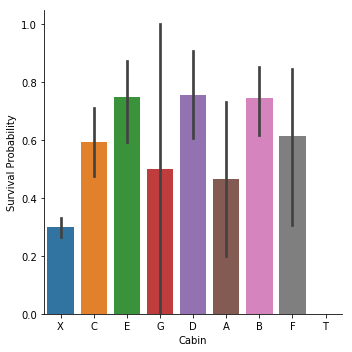

In [34]:
g = sns.catplot(y="Survived",x="Cabin",data=all_data,kind="bar")
g = g.set_ylabels("Survival Probability")


In [35]:
all_data["Cabin"].unique()


array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

The only thing we need to do is to fill the missing data.  
Since there are too many missing data, I decide not to predict, just treat it as another class.   

## 10. Embarked

In [36]:
all_data["Embarked"].head()


0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [37]:
all_data["Embarked"].isnull().sum()


2

In [38]:
# Fille the missing data
# Only two missing data. So, just use the most common one
all_data["Embarked"] = all_data["Embarked"].fillna("S")
all_data["Embarked"].isnull().sum()


0

In [39]:
all_data["Embarked"].unique()


array(['S', 'C', 'Q'], dtype=object)

In [40]:
# Encode the dato as 0, 1 and 2
all_data["Embarked"] = all_data["Embarked"].map({"S":0, "C":1, "Q":2})


## Overview the data after the process

In [41]:
all_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5,1.981001,X,0,0
1,2,1.0,1,1,38.0,1,0,PC,4.266662,C,1,1
2,3,1.0,3,1,26.0,0,0,STON/O2,2.070022,X,0,1
3,4,1.0,1,1,35.0,1,0,Num,3.972177,C,0,1
4,5,0.0,3,0,35.0,0,0,Num,2.085672,X,0,0


In [42]:
all_data.drop(labels = ["PassengerId"], axis = 1, inplace = True)


In [43]:
# creat categorical value for data with character value
all_data = pd.get_dummies(all_data, columns = ["Ticket"], prefix="T")
all_data = pd.get_dummies(all_data, columns = ["Cabin"], prefix="C")


In [44]:
all_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,T_A,T_A/4,T_A/5,T_A/S,T_A4,T_A5,T_AQ/3,T_AQ/4,T_C,T_CA,T_CA/SOTON,T_FC,T_FCC,T_Fa,T_LINE,T_LP,T_Num,T_P/PP,T_PC,T_PP,T_SC,T_SC/A3,T_SC/A4,T_SC/AH,T_SC/PARIS,T_SC/Paris,T_SCO/W,T_SO/C,T_SO/PP,T_SOC,T_SOP,T_SOTON/O2,T_SOTON/OQ,T_SP,T_STON/O,T_STON/O2,T_STON/OQ,T_SW/PP,T_W/C,T_WE/P,T_WEP,C_A,C_B,C_C,C_D,C_E,C_F,C_G,C_T,C_X
0,0.0,3,0,22.0,1,0,1.981001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,38.0,1,0,4.266662,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,3,1,26.0,0,0,2.070022,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,1,1,35.0,1,0,3.972177,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.0,3,0,35.0,0,0,2.085672,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modeling

## 1. Separat the data as training and testing

In [45]:
train_data = all_data[:train_len]
test_data = all_data[train_len:]

test_info = test_data.drop(labels=["Survived"],axis = 1)

train_label = train_data["Survived"].astype(int)
train_info = train_data.drop(labels = ["Survived"],axis = 1)


In [46]:
print("The # of training data: {}".format(train_label.shape[0]))
print("The # of training data: {}\nThe dimension of training data: {}".format(train_info.shape[0],train_info.shape[1]))
print("The # of testing data: {}\nThe dimension of testing data: {}".format(test_info.shape[0],test_info.shape[1]))


The # of training data: 891
The # of training data: 891
The dimension of training data: 58
The # of testing data: 418
The dimension of testing data: 58


## 2. Define the Classifiers

In [47]:
classifiers = []
classifiers.append(SVC(random_state = 2))
classifiers.append(AdaBoostClassifier(random_state = 2))
classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(MLPClassifier(random_state = 2))
classifiers.append(RandomForestClassifier(random_state = 2))
classifiers.append(DecisionTreeClassifier(random_state = 2))


In [48]:
kfold = StratifiedKFold(n_splits=5)


In [49]:
# evaluate and fit the classifiers
result = []
for i in classifiers:
    result.append(cross_val_score(i, train_info, y = train_label, scoring = "accuracy", cv = kfold, n_jobs=1))
    i = i.fit(train_info, train_label)
means = []
for i in result:
    means.append(i.mean())
    

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

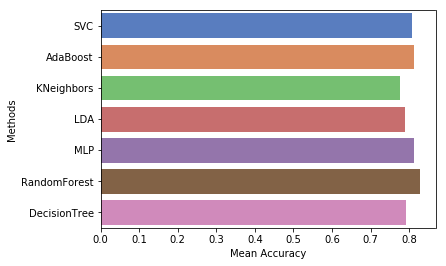

In [50]:
res = pd.DataFrame({"Means":means,"Methods":['SVC','AdaBoost','KNeighbors','LDA',
                                             'MLP','RandomForest','DecisionTree']})
g = sns.barplot("Means","Methods",data = res, palette="muted")
title = g.set_xlabel("Mean Accuracy")


All the classifier's accuracy is around 0.8. So, we can use all of them.

## 3. predict

In [51]:
predicts = np.empty((7,418))
row = 0
for i in classifiers:
    predicts[row,:] = i.predict(test_info)
    row += 1

In [52]:
print(predicts.shape)

(7, 418)


Generate the final result

In [53]:
res = []
for col in range(418):
    mean = np.mean(predicts[:,col])
    res.append(0 if mean <= 0.5 else 1)


# 3. Generate the submission file

In [54]:
result = pd.Series(res, name="Survived")
submit = pd.concat([test_ID,result],axis=1)
submit.to_csv("submission.csv",index=False)
